In [30]:
from extractvideo import *
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import skimage

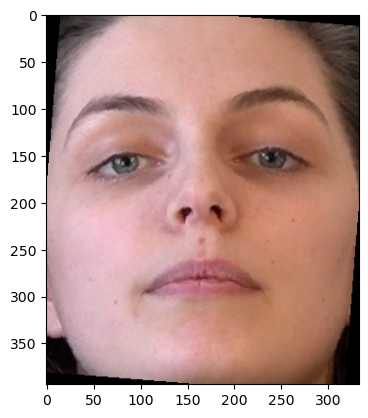

In [5]:
face = obtain_face(r'C:\Users\oskar\OneDrive\Dokument\repo\kandidat\frames\frames0.jpg')

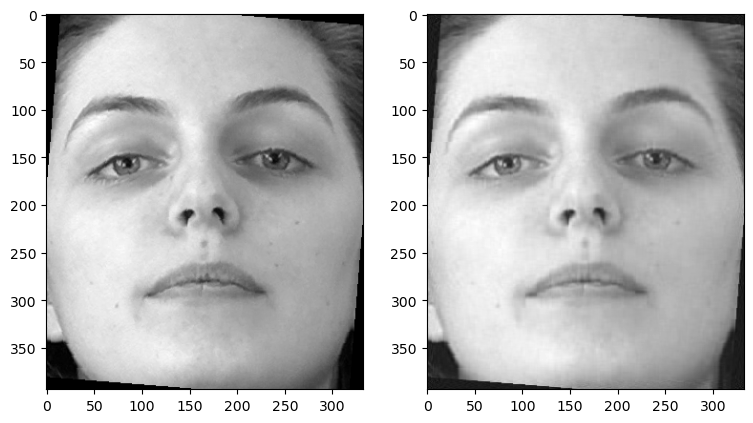

In [32]:
image = skimage.color.rgb2gray(face)
pca = PCA(n_components=50)
image_compressed = pca.fit_transform(image)
image_decompressed = pca.inverse_transform(image_compressed)

fig, axes = plt.subplots(1,2, figsize=(9, 9))
axes[0].imshow(image, cmap='gray')
axes[0].set_label("Original image")
axes[1].imshow(image_decompressed, cmap='gray')
axes[1].set_label("Compressed image")


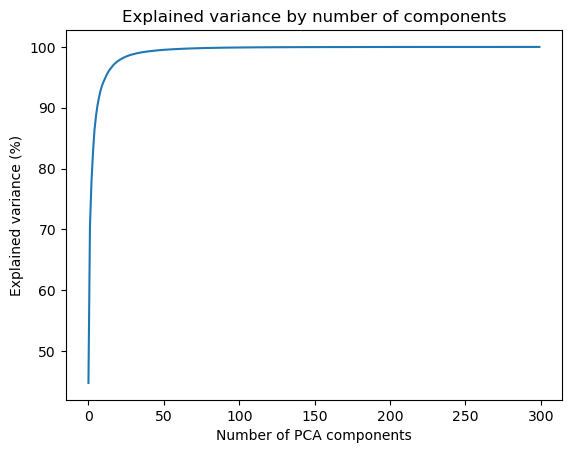

In [35]:
pca = PCA(n_components=300).fit(image) 

# Collect the explained variance of each component
explained_variance = pca.explained_variance_ratio_ 

# Component indices
components = [i for i in range(0, len(explained_variance))] 

# Explained variance in percents
explained_variance_percent = [100 * i for i in explained_variance] 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Explained variance by number of components')
ax.set_ylabel('Explained variance (%)')
ax.set_xlabel('Number of PCA components')

# Cumulative sum of the explained variance
ax.plot(components, np.cumsum(explained_variance_percent)) 


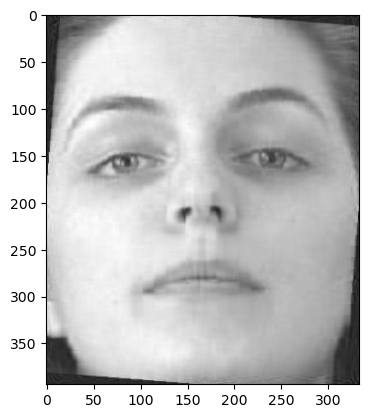

In [45]:
image = skimage.color.rgb2gray(face)
images = []
for i in [5,10,15,20,25,30]:
    pca = PCA(n_components=i)
    image_compressed = pca.fit_transform(image)
    images.append(pca.inverse_transform(image_compressed))

for i in images:
    plt.imshow(i,cmap = 'gray')
